In [ ]:
!pip install --upgrade imbalanced-learn
!pip install deap
!pip install imblearn
!pip install xgboost
!pip install lightgbm
!pip install vaex

In [ ]:
# Importing necessary library's

from sklearn.utils import shuffle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import cross_val_score, cross_val_predict
from deap import base, creator, tools, algorithms

### Considering Models

In [ ]:
#importing necessary model's

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier

# To Apply -
from imblearn.ensemble import EasyEnsembleClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Loading

import pandas as pd

df = pd.read_parquet("/content/drive/MyDrive/1.Colab Notebooks/CSP_IDSML/Dataset/archive (4)/cic-collection.parquet")
df_shuffled = shuffle(df, random_state=42)
df_changedrows = df_shuffled.sample(frac=0.1, random_state=42)

df_ga = df_changedrows

In [ ]:
X =df["Label"].value_counts()
df.Label.unique()
X.shape # total 33 classes in y
print("Each count of:", X)

Each count of: Label
Benign                  7186189
DDoS-LOIC-HTTP           575364
DoS-Hulk                 318740
DDoS-HOIC                198861
Botnet                   145968
DDoS                     128062
DDoS-NTP                 121328
DDoS-TFTP                 98833
Bruteforce-SSH            97260
Infiltration              94857
DoS-Goldeneye             52324
DDoS-Syn                  47757
DDoS-UDP                  28863
DoS-Slowloris             15243
DDoS-MSSQL                11784
DDoS-UDPLag                8452
Bruteforce-FTP             5984
DoS-Slowhttptest           5271
DDoS-Ddossim               5115
DDoS-DNS                   3668
DoS-Slowread               2786
Portscan                   2255
DDoS-LDAP                  2092
Webattack-bruteforce       2020
DDoS-SNMP                  2017
DDoS-Slowloris             1858
DoS-Slowheaders            1649
Webattack-XSS               876
DoS-Rudy                    699
DDoS-NetBIOS                675
DoS-Slowbody       

## Plotting this imbalance of Y label

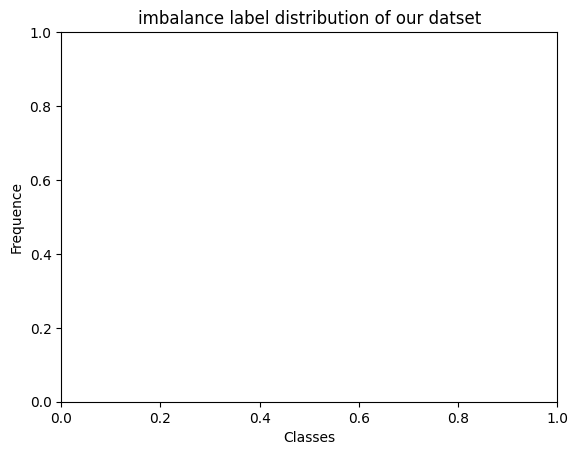

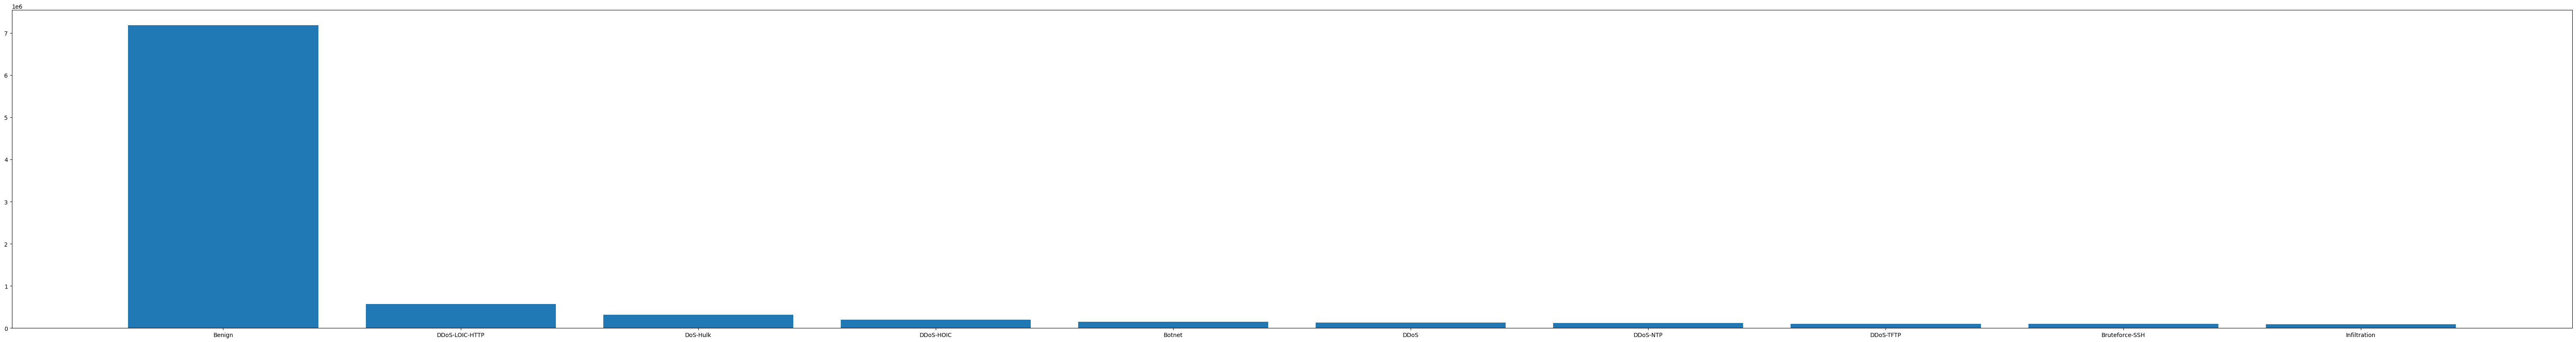

In [ ]:
x_label = df["Label"].value_counts()[:10]

plt.xlabel("Classes")
plt.ylabel("Frequence")
plt.title("imbalance label distribution of our datset")
#plt.xticks(rotation=90)

plt.figure(figsize=(80,10))
plt.bar(x_label.index, x_label.values)

plt.show()

In [ ]:
print(df_ga["Label"].value_counts())
total_label_count = df_ga["Label"].count()
print("total_label_count:", total_label_count)

df_total_900k = df_ga
df_total_900k.Label.unique()

Label
Benign                  719011
DDoS-LOIC-HTTP           56934
DoS-Hulk                 31909
DDoS-HOIC                19845
Botnet                   14706
DDoS                     12775
DDoS-NTP                 12164
DDoS-TFTP                 9857
Bruteforce-SSH            9803
Infiltration              9546
DoS-Goldeneye             5263
DDoS-Syn                  4730
DDoS-UDP                  2857
DoS-Slowloris             1568
DDoS-MSSQL                1148
DDoS-UDPLag                845
Bruteforce-FTP             633
DDoS-Ddossim               533
DoS-Slowhttptest           507
DDoS-DNS                   371
DoS-Slowread               279
Portscan                   211
DDoS-SNMP                  206
Webattack-bruteforce       203
DDoS-LDAP                  201
DDoS-Slowloris             187
DoS-Slowheaders            177
Webattack-XSS               79
DoS-Rudy                    76
DDoS-NetBIOS                66
DoS-Slowbody                60
Webattack-SQLi               7
Do

array(['DDoS-LOIC-HTTP', 'Benign', 'DoS-Hulk', 'DDoS-NTP', 'DDoS-HOIC',
       'Bruteforce-SSH', 'DDoS', 'DoS-Goldeneye', 'Infiltration',
       'Botnet', 'DDoS-UDP', 'DDoS-TFTP', 'DDoS-Syn', 'DoS-Slowloris',
       'Bruteforce-FTP', 'DDoS-MSSQL', 'Portscan', 'DoS-Slowhttptest',
       'DDoS-Ddossim', 'DoS-Slowread', 'DDoS-UDPLag', 'Webattack-XSS',
       'DDoS-SNMP', 'DDoS-DNS', 'Webattack-bruteforce', 'DoS-Slowheaders',
       'DoS-Slowbody', 'DDoS-Slowloris', 'DoS-Rudy', 'DDoS-LDAP',
       'DDoS-NetBIOS', 'Webattack-SQLi', 'DoS-Heartbleed'], dtype=object)

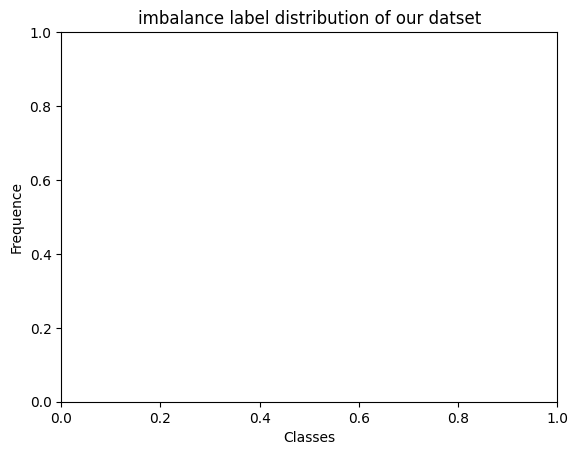

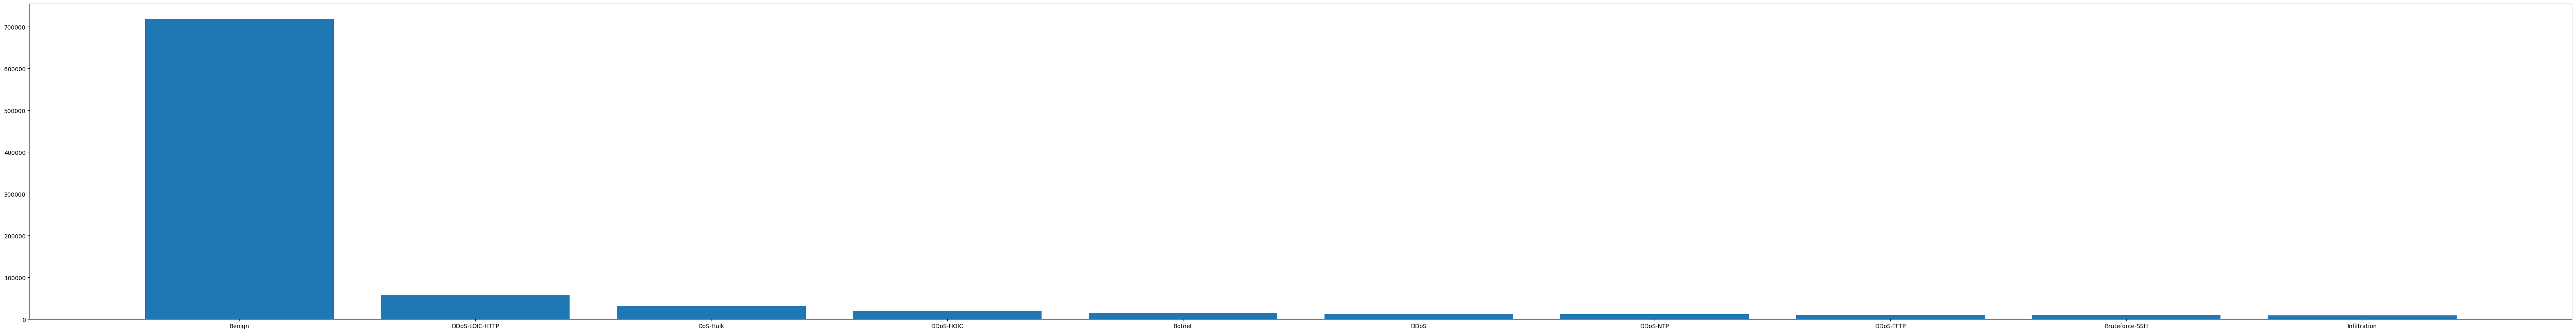

In [ ]:
x_label = df_ga["Label"].value_counts()[:10]

plt.xlabel("Classes")
plt.ylabel("Frequence")
plt.title("imbalance label distribution of our datset")
#plt.xticks(rotation=90)

plt.figure(figsize=(80,10))
plt.bar(x_label.index, x_label.values)

plt.show()

#### Feature Selection

1. Using Genetic Algortihm
(Using a new pipeline for model training)

In [ ]:
# Selecting all features from begining for use of GA

# x = df.columns
X_unfiltered = df_total_900k.drop(["ClassLabel", "Label"], axis=1) # bcz there value is very less #( "Webattack-SQLi", "DoS-Heartbleed")

# Define the labels you want to remove
labels_to_remove = ["Webattack-SQLi", "DoS-Heartbleed"]
# Filter X (the data without the unwanted labels)
X_filtered = X_unfiltered[~df_total_900k["Label"].isin(labels_to_remove)]


# Filter out rows where 'Label' is either 'Webattack-SQLi' or 'DoS-Heartbleed'
Y_filtered = df_total_900k[~df_total_900k["Label"].isin(["Webattack-SQLi", "DoS-Heartbleed"])] # only removing these two bcz of less data available.
Y = Y_filtered["Label"]
X = X_filtered
# Y = df_total_900k["Label"];

# print(X.count(), Y.count()) # After removing all the less data attributes we have same number of rows and columns that is 916750


X_columnNames = X.columns # Changing both it to columns , else as it would consider as a whole dataframe
Y_SeriesNames = Y

X_columnNames, Y_SeriesNames

(Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
        'Fwd Packets Length Total', 'Bwd Packets Length Total',
        'Fwd Packet Length Max', 'Fwd Packet Length Mean',
        'Fwd Packet Length Std', 'Bwd Packet Length Max',
        'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
        'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
        'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
        'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
        'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
        'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
        'Bwd Packets/s', 'Packet Length Max', 'Packet Length Mean',
        'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count',
        'URG Flag Count', 'Avg Packet Size', 'Avg Fwd Segment Size',
        'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
        'Subflow Bwd Packets', 

#### Checking the count in both X and Y , which have null values here below it will come 0 as there aren't any.

In [ ]:
# df_ga[X_columnNames].isna().sum() # This shows no missing values for all the defined rows mentioned in X. OUTPUTS=0 for every column
# df_ga["Label"].isna().sum() # This shows no missing values for all the target variable here it is ("Label"). OUTPUTS=0 for label column

1. First working on the first 10k data , as the whole data is big enough -  and will take a lot of storage, time, power.

In [ ]:
# X_F10k = X.iloc[:10000]
# Y_F10k = Y.iloc[:10000]

# X_F10k.count(), Y_F10k.count()

### Converting all columns to numeric , incase some are left in the categorical format

1. Using iterating method to convert every single column present in the dataset

In [ ]:
for col in X:
    df_total_900k[col] = pd.to_numeric(df_total_900k[col], errors='coerce')

#### Preproccessing
1. Using MinMax Scaler

In [ ]:
X, Y

(         Flow Duration  Total Fwd Packets  Total Backward Packets  \
 3403116       17359986                  2                       0   
 692042         4025815                 14                       9   
 1548991          23478                  1                       1   
 5568802          18801                  1                       1   
 2014450          26170                  2                       2   
 ...                ...                ...                     ...   
 2646478         355946                  3                       6   
 7349553       40567742                  6                       0   
 1771526            154                  3                       1   
 1085640            867                  3                       4   
 1445270        8947891                  9                      15   
 
          Fwd Packets Length Total  Bwd Packets Length Total  \
 3403116                       0.0                       0.0   
 692042                     14

In [ ]:
Y

,Label
3403116,DDoS-LOIC-HTTP
692042,Benign
1548991,Benign
5568802,Benign
2014450,Benign
...,...
2646478,DDoS
7349553,DDoS-Syn
1771526,Benign
1085640,Benign


In [ ]:
scaler = MinMaxScaler()

X_Scaled = scaler.fit_transform(X)
X_Scaled

array([[9.99876090e-01, 8.10681540e-06, 0.00000000e+00, ...,
        0.00000000e+00, 2.05562473e-05, 8.17246724e-04],
       [9.99859992e-01, 5.67477078e-05, 3.38836286e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99855160e-01, 4.05340770e-06, 3.76484762e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99855132e-01, 1.21602231e-05, 3.76484762e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99855133e-01, 1.21602231e-05, 1.50593905e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99865934e-01, 3.64806693e-05, 5.64727143e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

#### Splitting
1. Data Splitting and appying GA algorithm

In [ ]:
# Using SMOTE - To handle data imbalance fo df_ga

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_Scaled, Y)

In [ ]:
(X_resampled.shape, y_resampled.shape)

((22289341, 57), (22289341,))

In [ ]:
# For NumPy arrays, use regular slicing
#(This two for GA - feature selection)
x_first1k = X_resampled[:1000]
y_first1k = y_resampled[:1000]


x_first50k = X_resampled[:50000]
y_first50k = y_resampled[:50000]
x_first50k.shape

(50000, 57)

In [ ]:
random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x_first1k, y_first1k, train_size=0.8)

# Define the fitness function (maximize accuracy)
def evaluate(individual, x_train, y_train):
    # Convert the binary individual to a feature subset
    selected_features = [index for index, bit in enumerate(individual) if bit == 1]
    if len(selected_features) == 0:
        return 0,  # Avoid empty feature set

    x_subset = x_train[:, selected_features]
    clf = RandomForestClassifier(random_state=42)
    accuracy = cross_val_score(clf, x_subset, y_train, cv=3, scoring='accuracy').mean()

    return accuracy,

# Set up the GA
def feature_selection_ga(x_train, y_train, n_population=50, n_generations=10):
    n_features = x_train.shape[1]

    # Create the fitness and individual classes
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # GA setup
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 0, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", evaluate, x_train=x_train, y_train=y_train)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Initialize population
    population = toolbox.population(n=n_population)

    # Run the algorithm (simple evolutionary algorithm)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=n_generations, verbose=True)

    # Select the best individual
    best_individual = tools.selBest(population, 1)[0]
    selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]
    return selected_features

selected_features = feature_selection_ga(x_train, y_train)

# Print selected features

print("Selected feature indices:", selected_features)

print("Selected feature names:", [X.columns[i] for i in selected_features])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

KeyboardInterrupt: 

In [ ]:
#### Using genetic algorithm we got these selected column:
# X_SelectedColumn = ['Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
#                 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
#                 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd Header Length', 'Packet Length Max', 'Packet Length Std',
#                 'Packet Length Variance', 'URG Flag Count', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Init Bwd Win Bytes',
#                 'Fwd Act Data Packets', 'Active Mean', 'Active Std', 'Active Max', 'Idle Max']

X_Selected = ['Total Fwd Packets', 'Total Backward Packets', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Std',
              'Flow IAT Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd PSH Flags', 'Bwd Header Length', 'Fwd Packets/s',
              'Packet Length Max', 'Packet Length Mean', 'URG Flag Count', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Active Std',
              'Idle Mean', 'Idle Std', 'Idle Min']

len(X_Selected) # we got 31 Selected Column , after Using GA

31

In [ ]:
X1 = X_Selected # Same as above.

Y1 = df_total_900k["Label"]

df_total_900k[X1]

,Total Fwd Packets,Total Backward Packets,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow IAT Std,Flow IAT Max,Fwd IAT Mean,...,URG Flag Count,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Active Std,Idle Mean,Idle Std,Idle Min
3403116,2,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,17400000.0,1.740000e+07,...,0,0.000000,0.000000,0,2049,-1,0.000000,17400000.0,0.00,17400000.0
692042,14,9,1731.0,725.0,102.857140,386.074463,787.666597,2.456748e+05,937514.0,3.096781e+05,...,0,102.857140,192.333328,1731,8192,62560,0.000000,0.0,0.00,0.0
1548991,1,1,128.0,47.0,47.000000,0.000000,7453.786524,0.000000e+00,23478.0,0.000000e+00,...,0,47.000000,128.000000,128,-1,-1,0.000000,0.0,0.00,0.0
5568802,1,1,109.0,44.0,44.000000,0.000000,8137.865007,0.000000e+00,18801.0,0.000000e+00,...,0,44.000000,109.000000,109,-1,-1,0.000000,0.0,0.00,0.0
2014450,2,2,264.0,47.0,47.000000,0.000000,13679.786015,1.385274e+04,24717.0,2.566800e+04,...,0,47.000000,132.000000,264,-1,-1,0.000000,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646478,3,6,11601.0,20.0,8.666667,2189.772949,32665.067170,1.150981e+05,328394.0,1.351100e+04,...,0,8.666667,1933.500000,11601,8192,229,0.000000,0.0,0.00,0.0
7349553,6,0,0.0,6.0,6.000000,0.000000,0.887405,1.123418e+07,22640624.0,8.113548e+06,...,0,6.000000,0.000000,0,5840,-1,33.941124,20283824.0,3333019.25,17927024.0
1771526,3,1,0.0,31.0,10.333333,0.000000,201298.701300,5.054041e+01,103.0,2.550000e+01,...,0,10.333333,0.000000,0,1013,0,0.000000,0.0,0.00,0.0
1085640,3,4,488.0,161.0,53.666668,244.000000,748558.246800,1.060429e+02,290.0,2.350000e+02,...,0,53.666668,122.000000,488,8192,149,0.000000,0.0,0.00,0.0


In [ ]:
df_total_900k.Label.unique(),
# np.unique(y_resampled)
x_first50k.shape
y_first50k.shape

(50000,)

In [ ]:
y_first50k.value_counts()
#y_first10k
# Y.value_counts()

,count
Label,
Benign,39033
DDoS-LOIC-HTTP,3204
DoS-Hulk,1769
DDoS-HOIC,1063
Botnet,828
DDoS-NTP,720
DDoS,679
Bruteforce-SSH,564
Infiltration,562


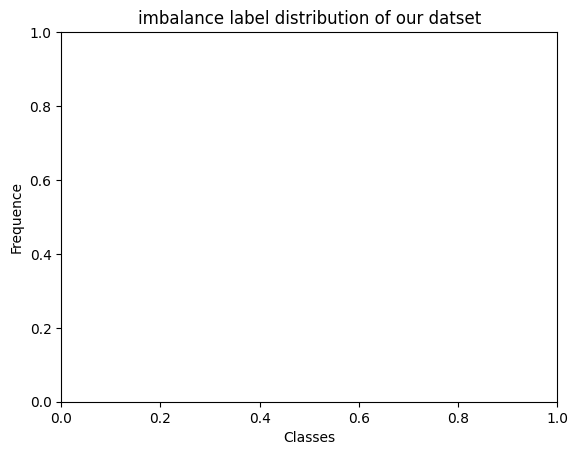

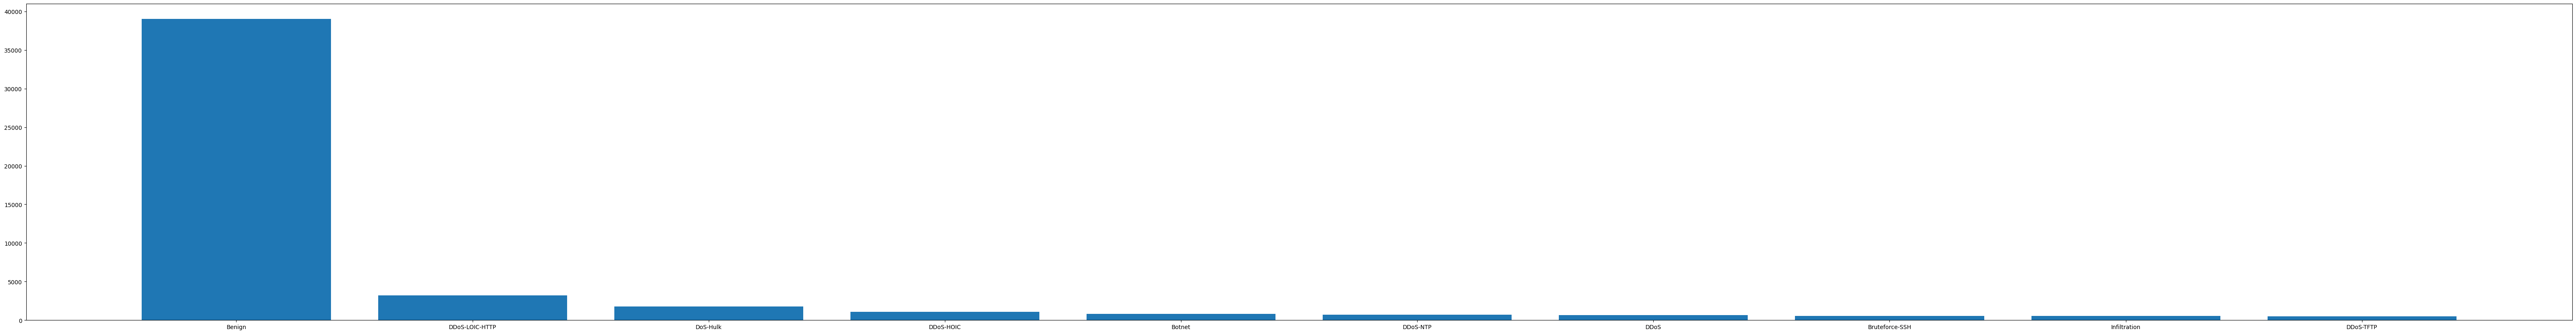

In [ ]:
x_label = y_first50k.value_counts()[:10]

plt.xlabel("Classes")
plt.ylabel("Frequence")
plt.title("imbalance label distribution of our datset")
#plt.xticks(rotation=90)

plt.figure(figsize=(80,10))
plt.bar(x_label.index, x_label.values)

plt.show()

#### Splitting Our first 10k Dataset into train and test

In [ ]:
np.random.seed(42)

x1_train, x1_test, y1_train, y1_test = train_test_split(x_first50k, y_first50k, test_size=0.2, random_state=42, stratify=y_first50k)

len(x1_train),len(x1_test) # (40000, 10000) Split complete

(40000, 10000)

### Random Forest Classifier

In [ ]:
models1 = {
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    # "SVM": SVC(class_weight='balanced', random_state=42), removing for now as it is not performing not that well- took 15 mins and got 22 percent acccuracy
}

# Train and evaluate models
for name, model1 in models1.items():
    print("`training Score`")
    model1.fit(x1_train, y1_train)
    print(f"{name} score:", model1.score(x1_train, y1_train))
    y1rf_pred = model1.predict(x1_test)
    print("`testing Score`")
    model1.fit(x1_test, y1_test)
    print(f"{name} score:", model1.score(x1_test, y1_test))
    print(f"Model: {name}")
    print("classification_report", classification_report(y1_test, y1rf_pred))

`training Score`
RandomForest score: 0.9881
`testing Score`
RandomForest score: 0.9976
Model: RandomForest
classification_report                       precision    recall  f1-score   support

              Benign       0.98      0.98      0.98      7807
              Botnet       0.99      0.98      0.98       166
      Bruteforce-FTP       1.00      1.00      1.00         8
      Bruteforce-SSH       0.99      1.00      1.00       113
                DDoS       0.99      0.99      0.99       136
            DDoS-DNS       0.25      0.25      0.25         4
        DDoS-Ddossim       1.00      0.71      0.83         7
           DDoS-HOIC       1.00      1.00      1.00       213
           DDoS-LDAP       0.00      0.00      0.00         2
      DDoS-LOIC-HTTP       0.98      0.99      0.99       641
          DDoS-MSSQL       0.90      0.64      0.75        14
            DDoS-NTP       0.99      0.99      0.99       144
        DDoS-NetBIOS       0.00      0.00      0.00         1
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Evaluate the performance of the optimized stacked model
print("Optimized Stacked Model Classification Report (Averaged Metrics)")

# Calculate average precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y1_test, y1rf_pred, average="weighted"
)

# Print the average metrics
print(f"Average Precision: {precision:.4f}")
print(f"Average Recall: {recall:.4f}")
print(f"Average F1-Score: {f1_score:.4f}")
print("Optimized Stacked Model Accuracy:", accuracy_score(y1_test, y1rf_pred))

Optimized Stacked Model Classification Report (Averaged Metrics)
Average Precision: 0.9720
Average Recall: 0.9701
Average F1-Score: 0.9709
Optimized Stacked Model Accuracy: 0.9701


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### XGBoost

In [ ]:
label_encoder = LabelEncoder()
y1_train_encoded = label_encoder.fit_transform(y1_train)
y1_test_encoded = label_encoder.fit_transform(y1_test)

In [ ]:
# Train XGBoost using the encoded labels
xgb_model = XGBClassifier(scale_pos_weight='balanced', random_state=42)
xgb_model.fit(x1_train, y1_train_encoded)

# To evaluate the model
print("XGBoost Training score:", xgb_model.score(x1_train, y1_train_encoded))
print("XGBoost Testing score:", xgb_model.score(x1_test, y1_test_encoded))

xgb_pred = xgb_model.predict(x1_test)
xgb_pred_encoded = label_encoder.fit_transform(xgb_pred)
print(f"Model: XGBoost")
print("classification_report", classification_report(y1_test_encoded, xgb_pred_encoded))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:15:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training score: 0.992
XGBoost Testing score: 0.9806
Model: XGBoost
classification_report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7807
           1       1.00      0.98      0.99       166
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00       113
           4       0.99      0.99      0.99       136
           5       0.50      0.25      0.33         4
           6       1.00      0.86      0.92         7
           7       1.00      1.00      1.00       213
           8       0.17      0.50      0.25         2
           9       1.00      0.99      1.00       641
          10       0.92      0.79      0.85        14
          11       1.00      0.99      1.00       144
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.17      0.02     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Evaluate the performance of the optimized stacked model
print("Optimized Stacked Model Classification Report (Averaged Metrics)")

# Calculate average precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y1_test_encoded, xgb_pred, average="weighted"
)

# Print the average metrics
print(f"Average Precision: {precision:.4f}")
print(f"Average Recall: {recall:.4f}")
print(f"Average F1-Score: {f1_score:.4f}")
print("Optimized Stacked Model Accuracy:", accuracy_score(y1_test_encoded, xgb_pred))

Optimized Stacked Model Classification Report (Averaged Metrics)
Average Precision: 0.9702
Average Recall: 0.9806
Average F1-Score: 0.9753
Optimized Stacked Model Accuracy: 0.9806


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### LGBM

In [ ]:
lgbm = LGBMClassifier(boosting_type='gbdt', objective='multiclass', random_state=42)  # Change to 'multiclass' if it is a multiclass problem

print("`training Score`")
lgbm.fit(x1_train, y1_train)
print("LGBM train score:", lgbm.score(x1_train, y1_train))
y1lg_pred = lgbm.predict(x1_test)
print("`testing Score`")
lgbm.fit(x1_test, y1_test)
print("LGBM test score:", lgbm.score(x1_test, y1_test))
print("LGBM Model classification")
print("classification_report", classification_report(y1_test, y1lg_pred))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Evaluate the performance of the optimized stacked model
print("Optimized Stacked Model Classification Report (Averaged Metrics)")

# Calculate average precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y1_test, y1lg_pred, average="weighted"
)

# Print the average metrics
print(f"Average Precision: {precision:.4f}")
print(f"Average Recall: {recall:.4f}")
print(f"Average F1-Score: {f1_score:.4f}")
print("Optimized Stacked Model Accuracy:", accuracy_score(y1_test, y1lg_pred))

Optimized Stacked Model Classification Report (Averaged Metrics)
Average Precision: 0.7002
Average Recall: 0.7366
Average F1-Score: 0.7156
Optimized Stacked Model Accuracy: 0.7366


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVC

In [ ]:
svc = SVC(kernel='rbf', random_state=42)

# Train the model
print("`training Score`")
svc.fit(x1_train, y1_train)
print("SVC train score:", svc.score(x1_train, y1_train))
y1svc_pred = svc.predict(x1_test)
print("`testing Score`")
svc.fit(x1_test, y1_test)
print("SVC test score:", svc.score(x1_test, y1_test))
print("SVC Model classification")
print("classification_report", classification_report(y1_test, y1svc_pred))

`training Score`
SVC train score: 0.814675
`testing Score`
SVC test score: 0.798
SVC Model classification
classification_report                       precision    recall  f1-score   support

              Benign       0.83      1.00      0.90      7807
              Botnet       0.00      0.00      0.00       166
      Bruteforce-FTP       0.00      0.00      0.00         8
      Bruteforce-SSH       0.00      0.00      0.00       113
                DDoS       0.93      0.29      0.45       136
            DDoS-DNS       0.00      0.00      0.00         4
        DDoS-Ddossim       0.00      0.00      0.00         7
           DDoS-HOIC       0.00      0.00      0.00       213
           DDoS-LDAP       0.00      0.00      0.00         2
      DDoS-LOIC-HTTP       0.00      0.00      0.00       641
          DDoS-MSSQL       0.60      0.64      0.62        14
            DDoS-NTP       0.51      0.98      0.67       144
        DDoS-NetBIOS       0.00      0.00      0.00         1
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Evaluate the performance of the optimized stacked model
print("Optimized Stacked Model Classification Report (Averaged Metrics)")

# Calculate average precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y1_test, y1svc_pred, average="weighted"
)

# Print the average metrics
print(f"Average Precision: {precision:.4f}")
print(f"Average Recall: {recall:.4f}")
print(f"Average F1-Score: {f1_score:.4f}")
print("Optimized Stacked Model Accuracy:", accuracy_score(y1_test, y1svc_pred))

Optimized Stacked Model Classification Report (Averaged Metrics)
Average Precision: 0.6925
Average Recall: 0.8139
Average F1-Score: 0.7416
Optimized Stacked Model Accuracy: 0.8139


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## MLP

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  # 2 hidden layers with 100 and 50 neurons
                    activation='relu',             # Activation function: 'relu', can also try 'tanh', 'logistic'
                    solver='adam',                 # Optimizer: 'adam', can also try 'sgd'
                    random_state=42,
                    max_iter=500)

mlp.fit(x1_train, y1_train)
print("MLP Training Score", mlp.score(x1_train, y1_train))

print("MLP Testing Score", mlp.score(x1_test, y1_test))

y1mlp_pred = mlp.predict(x1_test)

print("MLP Model classification")
print("classification_report", classification_report(y1_test, y1mlp_pred))

MLP Training Score 0.95715
MLP Testing Score 0.9577
MLP Model classification
classification_report                       precision    recall  f1-score   support

              Benign       0.95      1.00      0.98      7807
              Botnet       0.98      0.96      0.97       166
      Bruteforce-FTP       1.00      0.88      0.93         8
      Bruteforce-SSH       0.98      1.00      0.99       113
                DDoS       1.00      0.70      0.82       136
            DDoS-DNS       0.50      0.25      0.33         4
        DDoS-Ddossim       1.00      0.86      0.92         7
           DDoS-HOIC       0.97      1.00      0.98       213
           DDoS-LDAP       0.00      0.00      0.00         2
      DDoS-LOIC-HTTP       1.00      0.98      0.99       641
          DDoS-MSSQL       0.90      0.64      0.75        14
            DDoS-NTP       0.99      0.99      0.99       144
        DDoS-NetBIOS       0.00      0.00      0.00         1
           DDoS-SNMP       0.40 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

## Calculating Precision , Recall , F-1 Score

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Evaluate the performance of the optimized stacked model
print("Optimized Stacked Model Classification Report (Averaged Metrics)")

# Calculate average precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y1_test, y1mlp_pred, average="weighted"
)

# Print the average metrics
print(f"Average Precision: {precision:.4f}")
print(f"Average Recall: {recall:.4f}")
print(f"Average F1-Score: {f1_score:.4f}")
print("Optimized Stacked Model Accuracy:", accuracy_score(y1_test, y1mlp_pred))


Optimized Stacked Model Classification Report (Averaged Metrics)
Average Precision: 0.9467
Average Recall: 0.9577
Average F1-Score: 0.9485
Optimized Stacked Model Accuracy: 0.9577


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Creating a stacking technique, For Hybrid approach

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
y1_train_encoded = label_encoder.fit_transform(y1_train)
y1_test_encoded = label_encoder.transform(y1_test)

In [ ]:
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42, max_iter=500)

In [ ]:
xgb_model.fit(x1_train, y1_train_encoded)
rf_model.fit(x1_train, y1_train)
mlp_model.fit(x1_train, y1_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [ ]:
xgb_pred = cross_val_predict(xgb_model, x1_train, y1_train_encoded, cv=5, method="predict")
rf_pred = cross_val_predict(rf_model, x1_train, y1_train_encoded, cv=5, method="predict")
mlp_pred = cross_val_predict(mlp_model, x1_train, y1_train_encoded, cv=5, method="predict")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Stack predictions to create a new feature set for the meta-model
stacked_features_train = np.column_stack((xgb_pred, rf_pred, mlp_pred))

# Meta-Model
meta_model = LogisticRegression()
meta_model.fit(stacked_features_train, y1_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Get the unique labels from training data after encoding
unique_labels = label_encoder.classes_

# Function to safely transform predictions, handling any unseen labels
def safe_transform(predictions):
    return [label_encoder.transform([pred])[0] if pred in unique_labels else -1 for pred in predictions]

# Make predictions and safely encode
xgb_test_pred = safe_transform(xgb_model.predict(x1_test))
rf_test_pred = safe_transform(rf_model.predict(x1_test))
mlp_test_pred = safe_transform(mlp_model.predict(x1_test))

# Stack test predictions for the meta-model
stacked_features_test = np.column_stack((xgb_test_pred, rf_test_pred, mlp_test_pred))

# Use the meta-model to make the final predictions
final_predictions_encoded = meta_model.predict(stacked_features_test)

# Decode final predictions for evaluation
final_predictions = label_encoder.inverse_transform(final_predictions_encoded)

# Evaluate the model's performance
print("Stacked Model Classification Report")
print(classification_report(y1_test, final_predictions))
print("Stacked Model Accuracy:", accuracy_score(y1_test, final_predictions))


Stacked Model Classification Report
                      precision    recall  f1-score   support

              Benign       0.82      1.00      0.90      7807
              Botnet       0.00      0.00      0.00       166
      Bruteforce-FTP       0.00      0.00      0.00         8
      Bruteforce-SSH       0.00      0.00      0.00       113
                DDoS       0.00      0.00      0.00       136
            DDoS-DNS       0.00      0.00      0.00         4
        DDoS-Ddossim       0.00      0.00      0.00         7
           DDoS-HOIC       0.00      0.00      0.00       213
           DDoS-LDAP       0.00      0.00      0.00         2
      DDoS-LOIC-HTTP       0.00      0.00      0.00       641
          DDoS-MSSQL       0.00      0.00      0.00        14
            DDoS-NTP       0.00      0.00      0.00       144
        DDoS-NetBIOS       0.00      0.00      0.00         1
           DDoS-SNMP       0.00      0.00      0.00         2
      DDoS-Slowloris       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Primarily we are getting a accuracy of 78% on the test data set on the meta model.

# **Going with a different approach for better optimization**

In [ ]:
# Obtain probability predictions for stacking
xgb_pred_proba = cross_val_predict(xgb_model, x1_train, y1_train_encoded, cv=5, method="predict_proba")
rf_pred_proba = cross_val_predict(rf_model, x1_train, y1_train_encoded, cv=5, method="predict_proba")
mlp_pred_proba = cross_val_predict(mlp_model, x1_train, y1_train_encoded, cv=5, method="predict_proba")

# Stack probabilities for meta-model training
stacked_features_train = np.hstack((xgb_pred_proba, rf_pred_proba, mlp_pred_proba))

# Use a more powerful meta-model (e.g., XGBoost)
meta_model = XGBClassifier(random_state=42)
meta_model.fit(stacked_features_train, y1_train_encoded)

# Predict on test set using probability stacking
xgb_test_pred_proba = xgb_model.predict_proba(x1_test)
rf_test_pred_proba = rf_model.predict_proba(x1_test)
mlp_test_pred_proba = mlp_model.predict_proba(x1_test)

stacked_features_test = np.hstack((xgb_test_pred_proba, rf_test_pred_proba, mlp_test_pred_proba))
final_predictions_encoded = meta_model.predict(stacked_features_test)
final_predictions = label_encoder.inverse_transform(final_predictions_encoded)

# Evaluate the performance of the optimized stacked model
print("Optimized Stacked Model Classification Report")
print(classification_report(y1_test, final_predictions))
print("Optimized Stacked Model Accuracy:", accuracy_score(y1_test, final_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_

Optimized Stacked Model Classification Report
                      precision    recall  f1-score   support

              Benign       0.98      1.00      0.99      7807
              Botnet       1.00      0.98      0.99       166
      Bruteforce-FTP       1.00      1.00      1.00         8
      Bruteforce-SSH       0.99      1.00      1.00       113
                DDoS       1.00      0.99      1.00       136
            DDoS-DNS       0.40      0.50      0.44         4
        DDoS-Ddossim       1.00      0.71      0.83         7
           DDoS-HOIC       1.00      1.00      1.00       213
           DDoS-LDAP       0.50      0.50      0.50         2
      DDoS-LOIC-HTTP       1.00      0.99      0.99       641
          DDoS-MSSQL       0.92      0.79      0.85        14
            DDoS-NTP       1.00      0.99      1.00       144
        DDoS-NetBIOS       0.00      0.00      0.00         1
           DDoS-SNMP       0.00      0.00      0.00         2
      DDoS-Slowloris   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Evaluate the performance of the optimized stacked model
print("Optimized Stacked Model Classification Report (Averaged Metrics)")

# Calculate average precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(
    y1_test, final_predictions, average="weighted"
)

# Print the average metrics
print(f"Average Precision: {precision:.4f}")
print(f"Average Recall: {recall:.4f}")
print(f"Average F1-Score: {f1_score:.4f}")
print("Optimized Stacked Model Accuracy:", accuracy_score(y1_test, final_predictions))

# **after Optimizing, using a non-linear meta model, we got an final accuracy score of 98%**

#### ________________________THExEND__________________________________________________________________________________

# **This Section uses correlation matrix for feature selection**

In [ ]:
#### Using SMOTE - To handle data imbalance

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_ga[X1], Y1)

In [ ]:

#Features to remove: ['Bwd Packets Length Total', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Packets/s', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Fwd Act Data Packets', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max']
# Remaining features after filtering: Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
#        'Fwd Packets Length Total', 'Fwd Packet Length Max',
#        'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Flow Bytes/s',
#        'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Bwd IAT Total',
#        'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd PSH Flags', 'Fwd Header Length',
#        'Bwd Header Length', 'Bwd Packets/s', 'URG Flag Count',
#        'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Seg Size Min',
#        'Active Mean', 'Active Std', 'Idle Min'],
#       dtype='object')

In [ ]:
df_trial = df

numeric_df = df.select_dtypes(['object'])                                        # We can see in our dataframe we only have these two String type columns (Which thus becomes our target column here we are considering ["Label"])
numeric_df.head()

,Label,ClassLabel
0,Benign,Benign
1,Benign,Benign
2,Benign,Benign
3,Benign,Benign
4,Benign,Benign


In [ ]:
# setting up the target variable and feature variable
np.random.seed(42)

x1 = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Bwd Packets/s', 'URG Flag Count',
       'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Idle Min']

y1 = df_trial['Label']

# for col in x1:
#     df_trial[col] = pd.to_numeric(df_trial[col], errors='coerce')

# scaler = MinMaxScaler()

# df_trial[x1] = scaler.fit_transform(df_trial[x1])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_trial[x1], y1)

# after using SMOTE >>>
y_resampled.count()  # output - 237144237
X_resampled.count()  # output - 237144237

,0
Flow Duration,237144237
Total Fwd Packets,237144237
Total Backward Packets,237144237
Fwd Packets Length Total,237144237
Fwd Packet Length Max,237144237
Fwd Packet Length Mean,237144237
Bwd Packet Length Max,237144237
Flow Bytes/s,237144237
Flow Packets/s,237144237
Flow IAT Mean,237144237


## The actual data has millions of rows, training on whole model would take significant amount of time, and computation cost.

##So we are training on first 10k model to check how is our model performing.

###### Unique classes in y_first10k: ['Benign' 'Botnet' 'Bruteforce-FTP' 'Bruteforce-SSH' 'DDoS' 'DDoS-DNS', 'DDoS-Ddossim' 'DDoS-HOIC' 'DDoS-LDAP' 'DDoS-LOIC-HTTP' 'DDoS-MSSQL''DDoS-NTP' 'DDoS-NetBIOS' 'DDoS-SNMP' 'DDoS-Slowloris' 'DDoS-Syn''DDoS-TFTP' 'DDoS-UDP' 'DDoS-UDPLag' 'DoS-Goldeneye' 'DoS-Heartbleed''DoS-Hulk' 'DoS-Rudy' 'DoS-Slowbody' 'DoS-Slowheaders' 'DoS-Slowhttptest''DoS-Slowloris' 'DoS-Slowread' 'Infiltration' 'Portscan' 'Webattack-SQLi''Webattack-XSS' 'Webattack-bruteforce']

In [ ]:
# df_trial[x1].head()

# trying to Reshuffle

#X_shuffled, y_shuffled = shuffle(X_resampled, y_resampled, random_state=42)

# Select the first 10,000 rows after shuffling
x1_first10k = X_shuffled[:10000]
y1_first10k = y_shuffled[:10000]

# Verify if all unique labels are present in the first 10k rows
print("Unique classes in y_first10k:", np.unique(y1_first10k))

# Unique classes in y_first10k: ['Benign' 'Botnet' 'Bruteforce-FTP' 'Bruteforce-SSH' 'DDoS' 'DDoS-DNS'
#  'DDoS-Ddossim' 'DDoS-HOIC' 'DDoS-LDAP' 'DDoS-LOIC-HTTP' 'DDoS-MSSQL'
#  'DDoS-NTP' 'DDoS-NetBIOS' 'DDoS-SNMP' 'DDoS-Slowloris' 'DDoS-Syn'
#  'DDoS-TFTP' 'DDoS-UDP' 'DDoS-UDPLag' 'DoS-Goldeneye' 'DoS-Heartbleed'
#  'DoS-Hulk' 'DoS-Rudy' 'DoS-Slowbody' 'DoS-Slowheaders' 'DoS-Slowhttptest'
#  'DoS-Slowloris' 'DoS-Slowread' 'Infiltration' 'Portscan' 'Webattack-SQLi'
#  'Webattack-XSS' 'Webattack-bruteforce']

# x_first10k = X_resampled.iloc[:237144237]
# y_first10k = y_resampled.iloc[:237144237]

# y_first10k.head()

Unique classes in y_first10k: ['Benign' 'Botnet' 'Bruteforce-FTP' 'Bruteforce-SSH' 'DDoS' 'DDoS-DNS'
 'DDoS-Ddossim' 'DDoS-HOIC' 'DDoS-LDAP' 'DDoS-LOIC-HTTP' 'DDoS-MSSQL'
 'DDoS-NTP' 'DDoS-NetBIOS' 'DDoS-SNMP' 'DDoS-Slowloris' 'DDoS-Syn'
 'DDoS-TFTP' 'DDoS-UDP' 'DDoS-UDPLag' 'DoS-Goldeneye' 'DoS-Heartbleed'
 'DoS-Hulk' 'DoS-Rudy' 'DoS-Slowbody' 'DoS-Slowheaders' 'DoS-Slowhttptest'
 'DoS-Slowloris' 'DoS-Slowread' 'Infiltration' 'Portscan' 'Webattack-SQLi'
 'Webattack-XSS' 'Webattack-bruteforce']


In [ ]:
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(x_first10k, y_first10k)

In [ ]:
np.random.seed(42)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1_first10k, y1_first10k, test_size=0.2, random_state=42, stratify=y1_first10k)

#y1_train.count()

### Only RandomForest and SVM

In [ ]:
models = {
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "SVM": SVC(class_weight='balanced', random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(x1_train, y1_train)
    print(f"{name} score:", model.score(x1_train, y1_train))
    y1_pred = model.predict(x1_test)
    print(f"Model: {name}")
    print(classification_report(y1_test, y1_pred))

RandomForest score: 0.96525
SVM score: 0.34425


### XGBoost

In [ ]:
# Now reshuffle and select the first 10k rows as before
#X_shuffled, y_shuffled = shuffle(X_resampled, y_resampled, random_state=42)

# previously we have the data ->

# x1_first10k.count(), y1_first10k.count()


# Select the first 10,000 rows after shuffling
# x_first10k_XGB = X_shuffled[:10000]
# y_first10k_XGB = y_shuffled[:10000]

# x1_train_xgb, x1_test_xgb, y1_train_xgb, y1_test_xgb = train_test_split(x_first10k_XGB, y_first10k_XGB, test_size=0.2, random_state=42, stratify=y_first10k_XGB)


# Label-Encoding

label_encoder = LabelEncoder()
y_first10k_encoded = label_encoder.fit_transform(y1_first10k)


# Train XGBoost using the encoded labels
xgb_model = XGBClassifier(scale_pos_weight='balanced', random_state=42)
xgb_model.fit(x1_first10k, y_first10k_encoded)

# To evaluate the model
print("XGBoost score:", xgb_model.score(x1_first10k, y_first10k_encoded))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:37:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost score: 0.9691
